{'x': [1, 2, 2, 3, 4, 4, 5, 6], 'y': [2, 3, 4, 4, 4, 6, 5, 7]}


    x   y   xy   x2     y_pred   y-y_pred  (y-y_pred)^2
0   1   2    2    1   2.358491  -0.358491      0.128515
1   2   3    6    4   3.207547  -0.207547      0.043076
2   2   4    8    4   3.207547   0.792453      0.627981
3   3   4   12    9   4.056604  -0.056604      0.003204
4   4   4   16   16   4.905660  -0.905660      0.820221
5   4   6   24   16   4.905660   1.094340      1.197579
6   5   5   25   25   5.754717  -0.754717      0.569598
7   6   7   42   36   6.603774   0.396226      0.156995
8  27  35  135  111  24.433962  10.566038    111.641153

La pendiente es:  0.8490566037735849
El intersecto es:  1.5094339622641506
La sumatoria de la última columna sin la última fila es: 3.5471698113207544
3.375 4.375


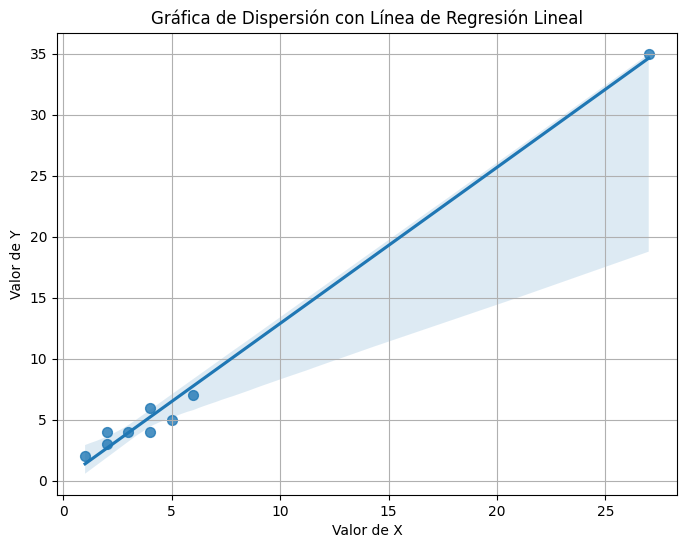

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


value_x_list = [1, 2, 2, 3, 4, 4, 5, 6]
value_y_list = [2, 3, 4, 4, 4, 6, 5, 7]

data_dict= {'x' : value_x_list, 'y':value_y_list}

print(data_dict)
print()

df = pd.DataFrame(data_dict)
df['xy']=df['x'] * (df['y'])
df['x2']=df['x'] ** 2



column_totals = df.sum().to_frame().T
column_totals.index = ['Total']
df = pd.concat([df, column_totals], ignore_index=True)

n= len(value_x_list)
x_pro = np.mean(value_x_list)
y_pro = np.mean(value_y_list)

sum_x = df.iloc[-1][0]
sum_y = df.iloc[-1][1]
sum_xy = df.iloc[-1][2]
sum_x2 = df.iloc[-1][3]

#print(sum_x, sum_y, sum_xy, sum_x2)
print()



m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b = y_pro - m * x_pro

df['y_pred']= m*df['x']+b
df['y-y_pred']=df['y']-df['y_pred']
df['(y-y_pred)^2']=df['y-y_pred']**2

print(df)
print()

print('La pendiente es: ', m)
print('El intersecto es: ', b)

last_column_name = df.columns[-1]

# Seleccionar la última columna y todas las filas excepto la última
last_column_without_total = df[last_column_name].iloc[:-1]

# Calcular la suma de la selección
sum_of_last_column_without_total = last_column_without_total.sum()
print(f"La sumatoria de la última columna sin la última fila es: {sum_of_last_column_without_total}")

print(x_pro, y_pro)

plt.figure(figsize=(8, 6)) # Opcional: ajusta el tamaño de la figura
sns.regplot(x='x', y='y', data=df, scatter_kws={'s': 50}) # Crea el scatter plot y la línea de regresión

plt.title('Gráfica de Dispersión con Línea de Regresión Lineal') # Título de la gráfica
plt.xlabel('Valor de X') # Etiqueta del eje X
plt.ylabel('Valor de Y') # Etiqueta del eje Y
plt.grid(True) # Opcional: añade una cuadrícula
plt.show()

